## Analyze A/B Test Results

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [57]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


e. The number of times the `new_page` and `treatment` don't line up.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [5]:
# create a data frame naed drop where the coorect group is not alligned with the correct landing_page
drop = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
drop.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [6]:
df2 = df.drop(drop.index)

b. There is one **user_id** repeated in **df2**.  What is it?

In [7]:
df2[(df2['user_id'].duplicated()) == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [8]:
df2.query('user_id ==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [9]:
# remove the row with the index number 2893 
df2 = df2.drop(2893)

In [10]:
df2.query('user_id ==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**$$H_0: \rho_{new} \le \rho_{old} $$**


**$$H_1: \rho_{new} > \rho_{old} $$**


**$\rho_{new}$ and $\rho_{old}$ are the population probabilities for the new page and old page, respectivley.**

**Under the null we are assuming that the new page is worse than or equal to the new page.**

**Under the altenative we are interested in seeing whether the new page is better.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [15]:
# there should be no difference between new and old page under the null, so convert rate for Pnew under the null should be the overall mean. 
p_new = df2['converted'].mean()
p_new

0.11959708724499628

In [16]:
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
n_new

145310

In [39]:
#returns 10000 simulations containing The NUMBER of successes from n_new trials that have a probability of p_new
new_page_converted = np.random.binomial(n_new, p_new, 10000)
new_page_converted

array([17290, 17295, 17261, ..., 17292, 17297, 17525])

In [40]:
# You want the proportion of successes: which is the number of successes divided by the number of trials, which is n_new
# A MUCH FASTER WAY TO GET A SAMPLING DISTRIBUTION OF P_NEWs
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
np.mean(new_page_converted)

0.1195986291377056

In [ ]:
# Another way to do this is: Creating the sampling distribution and looking up at the mean also gives the a very similar value. 
sample = []
for _ in range(10000):
    boot_samp = df2.sample(df2.shape[0], replace=True)
    prop_exp = boot_samp['converted'].mean()
    sample.append(prop_exp) 
    
np.mean(sample)

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [41]:
# it should be the same as Pnew and the overall mean. 
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [42]:
n_new = df2.query('landing_page=="new_page"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [43]:
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

**In order to simulate nnew transactions with a convert rate of pnew under the null, you should use either:**

**np.random.binomial(n, p, size), where (# n=1 trial size, p=probability of trial, size=number of trials to run)**

In [44]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 1, ..., 0, 0, 1])

**OR you can use: np.random.choice**

In [45]:
new_page_converted = np.random.choice([0,1],size=n_new, p=[1-p_new,p_new])
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

**OR there is a third approach by using Df.sample()**

In [30]:
new_sample = df2.sample(n_new, replace=True)
new_page_converted = new_sample['converted']
new_page_converted

171066    0
128617    0
113593    1
104651    0
73657     0
         ..
217200    0
247774    0
47601     0
249125    0
100619    0
Name: converted, Length: 145310, dtype: int64

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [46]:
old_sample = df2.sample(n_old, replace=True)
old_page_converted = old_sample['converted']
old_page_converted

104521    0
275275    0
211982    0
176612    0
282211    0
         ..
175067    0
70282     0
109885    0
69596     0
227545    0
Name: converted, Length: 145274, dtype: int64

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [47]:
sample_diff = (new_page_converted.mean())-(old_page_converted.mean())
sample_diff

-5.022519213328247e-05

In [48]:
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
# THIS CODE TAKES SO MUCH TIME TO RUN!!!
p_diffs = []
for _ in range(10000):
    boot_samp = df2.sample(df2.shape[0], replace=True)
    old_df = boot_samp.query('group == "control"')
    new_df = boot_samp.query('group == "treatment"')
    prop_old = old_df['converted'].mean()
    prop_new = new_df['converted'].mean()
    p_diffs.append(prop_new - prop_old) 

**When possible, it is always more computationally efficient to use numpy built-in operations over explicit for loops. The short reason is that numpy-based operations attack a computational problem based on vectors by computing large chunks simultaneously. Additionally, using loops to simulate 10000 can take a considerable amount of time vs using numpy.**

**Essentially, we are applying the null proportion to the total size of each page using the binomial distribution. Each element, for example, in np.random.binomial(n_new, p_new, 10000) results in an array with values like [17262, 17250, 17277...]. This array is 10000 elements large. When we divide it by n_new, Python broadcasts n_new for each element and we return a proportion for each element.**

**This is essentially is simulating, 10000, the new page conversion rate. We do this again for the old page.
The difference of the two will result in a simulated difference array of length 10000 between the new page and old page conversions.**

In [49]:
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted

In [50]:
np.random.binomial(n_new, p_new, 10000)
# returns 10000 simulations containing The NUMBER of successes from n_new 
# trials that have a probability of p_new

array([17366, 17325, 17496, ..., 17547, 17360, 17128])

In [51]:
n_new

145310

In [52]:
np.random.binomial(n_new, p_new, 10000)/n_new
# You want the proportion of successes: which is the number of successes 
# divided by the number of trials, which is n_new

array([0.12023949, 0.12203565, 0.12011561, ..., 0.12038401, 0.11935173,
       0.11973023])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

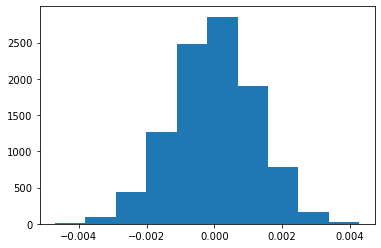

In [53]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

In [54]:
np.mean(p_diffs)

-7.179837114756527e-06

In [55]:
# observed - actual difference between the original two samples
obs_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
obs_diff

-0.0015782389853555567

**Sampling distribution for the difference in proportions of treatment and control:**

**This histogram displays the distribution of mean differences in proportions between control and treatment groups sampled randomly from the actual dataset repeated 10.000 times**

**The distribution seems normally distributed as expected with a mean of -0.0015 which is close to the actual observed sample mean between the two groups.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

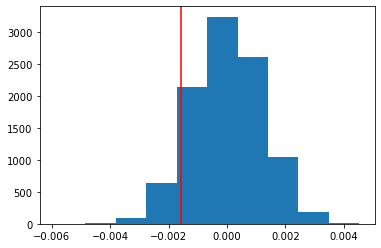

In [56]:
# let's simulate draws from the sampling distribution under the null hypothesis. 
# let's create a normal distribution centered at zero, with the same st dev and size as the simulated sampling distribution
# let's also see where our observed statistic falls.
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(obs_diff, c='red');


In [48]:
# let's calculate the probability of a statistic higher than observed.
# Given this is a one tailed test, this also corresponds to the p value.
prob_higher = (null_vals > obs_diff).mean()
prob_higher

0.8984

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called p value in scientific terms. Since this value is bigger than the type 1 error rate of 0.05, we can conclude that we have failed to reject the null, and we have no reason to believe that the new page is better than the old page. This also means that there is %90 probability (very high) that you would obtain a mean difference value of -0.0015 (obs_diff) assuming that there is no difference between the old and new page (null). We have no reason to believe that our observed difference in proportion does not come from the null distrbution. Based on this result the new page should NOT be launched.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [49]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"and converted == 1').user_id.count()
convert_new = df2.query('group == "treatment"and converted == 1').user_id.count()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
significance = 0.05

count = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')
                
print('z_score: %0.3f, p_value: %0.3f' % (z_score, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis")

z_score: -1.311, p_value: 0.905
Fail to reject the null hypothesis


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?